In [1]:
from STIS_pipeline_functions import *
sns.set_context("talk")

/Users/natalieallen/opt/anaconda3/lib/python3.8/site-packages/autograd/numpy/numpy_wrapper.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  int_types = {_np.int, _np.int8, _np.int16, _np.int32, _np.int64, _np.integer}


In [2]:
# read in data and calibration files - the test directory I have has 
# two different instruments so I just quickly sort those
data_files_430 = sorted(glob.glob("/Users/natalieallen/Downloads/wasp-121/HST/G430L/*/*flt.fits"))
data_files_750 = sorted(glob.glob("/Users/natalieallen/Downloads/wasp-121/HST/G750L/*/*flt.fits"))

In [3]:
# get the data from the files - since I use default settings, it reads out: data, header, jitter, dqs, errors
# currently I remove the last few files from the 750 data because they're flat frames rather than science data
# didn't realize this was a possibility to be included - will update the function to exclude anything that isn't 
# "science" in the get_data function later
data_430 = get_data(data_files_430)
data_750 = get_data(data_files_750[:-1])

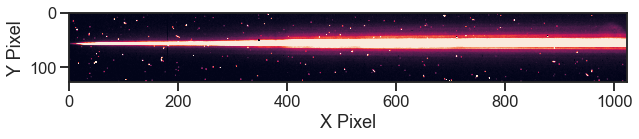

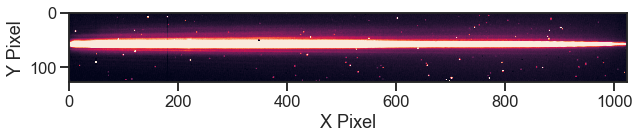

In [4]:
# check on one of the data frames (first part of data) - 430 first and then 750
plt.figure(figsize = (10,10))
im = plt.imshow(data_430[0][0])
im.set_clim(0,150)
plt.ylabel("Y Pixel")
plt.xlabel("X Pixel")
plt.show()

plt.figure(figsize = (10,10))
im = plt.imshow(data_750[0][0])
im.set_clim(0,150)
plt.ylabel("Y Pixel")
plt.xlabel("X Pixel")
plt.show()

In [53]:
# initialize a list for and then create traces for each of the data frames
trace_list_430 = []
for i in data_430[0]:
    # trace wants xi, xf, and an initial y guess - these are numbers I just chose from some testing
    # it can be seen above this just corresponds to the strongest flux
    # this function is fast so you can test for yourself if these values don't work!
    trace = trace_spectrum(i, 100,1000,60)
    trace_list_430.append(trace)

trace_list_750 = []
for i in data_750[0]:
    # trace wants xi, xf, and an initial y guess - these are numbers I just chose from some testing
    # it can be seen above this just corresponds to the strongest flux
    # this function is fast so you can test for yourself if these values don't work!
    trace = trace_spectrum(i, 100,1000,60)
    trace_list_750.append(trace)

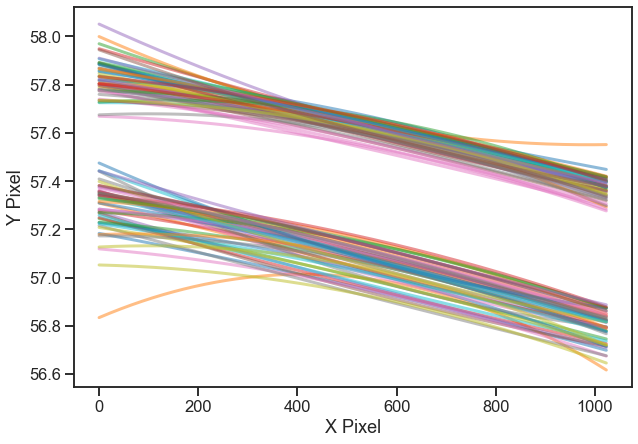

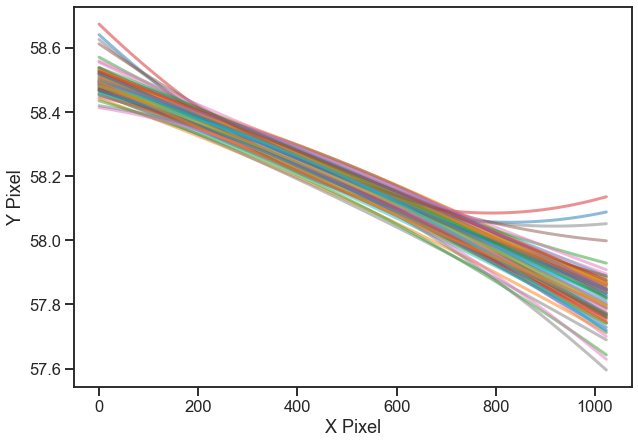

In [54]:
# fit a polynomial to the traces - I just use a second-order chebyshev
# and i fit it over the whole length of the data frame instead of just what was use for the fit
trace_fit_430 = []
plt.figure(figsize = (10,7))
for j in trace_list_430:
    coeffs1 = chebyshev.chebfit(j[0], j[1], deg=2)
    # plotting just to check everything looks okay
    plt.plot(np.arange(len(data_430[0][0][0])),chebyshev.chebval(np.arange(len(data_430[0][0][0])),coeffs1),lw=3, alpha = 0.5)
    trace = [np.arange(len(data_430[0][0][0])),chebyshev.chebval(np.arange(len(data_430[0][0][0])),coeffs1)]
    trace_fit_430.append(trace)
plt.ylabel("Y Pixel")
plt.xlabel("X Pixel")
plt.show()

# fit a polynomial to the traces - I just use a second-order chebyshev
# and i fit it over the whole length of the data frame instead of just what was use for the fit
trace_fit_750 = []
plt.figure(figsize = (10,7))
for j in trace_list_750:
    coeffs1 = chebyshev.chebfit(j[0], j[1], deg=2)
    # plotting just to check everything looks okay
    plt.plot(np.arange(len(data_750[0][0][0])),chebyshev.chebval(np.arange(len(data_750[0][0][0])),coeffs1),lw=3, alpha = 0.5)
    trace = [np.arange(len(data_750[0][0][0])),chebyshev.chebval(np.arange(len(data_750[0][0][0])),coeffs1)]
    trace_fit_750.append(trace)
plt.ylabel("Y Pixel")
plt.xlabel("X Pixel")
plt.show()

# there's maybe some outliers here, but this is just an initial trace to feed into the cleaning function
# so we don't worry about it - should subside once the cosmic rays are cleaned

In [56]:
# now to clean the data - default is all steps on (dq, difference_correct, hc_correct, spline_correct)
# i'm breaking up the orbits manually here, not sure what the best way to do this automatically is yet
# the spline function is a little broken at the moment, but if we use optimal extraction it doesn't matter 
# if we don't use it, so we turn it off here
cleaned_1_750 = clean_data(data_750[0][:4], dqs = data_750[3][:4], traces = trace_fit_750[:4], spline_correct = False)
cleaned_2_750= clean_data(data_750[0][4:8], dqs = data_750[3][4:8], traces = trace_fit_750[4:8], spline_correct = False)
cleaned_3_750 = clean_data(data_750[0][8:12], dqs = data_750[3][8:12], traces = trace_fit_750[8:12], spline_correct = False)


In [57]:
cleaned_4_750 = clean_data(data_750[0][12:17], data_750[3][12:17], traces = trace_fit_750[12:17], spline_correct = False)
cleaned_5_750 = clean_data(data_750[0][17:22], data_750[3][17:22], traces = trace_fit_750[17:22], spline_correct = False)
cleaned_6_750 = clean_data(data_750[0][22:27], data_750[3][22:27], traces = trace_fit_750[22:27], spline_correct = False)

cleaned_7_750 = clean_data(data_750[0][27:32], data_750[3][27:32], traces = trace_fit_750[27:32], spline_correct = False)
cleaned_8_750 = clean_data(data_750[0][32:37], data_750[3][32:37], traces = trace_fit_750[32:37], spline_correct = False)
cleaned_9_750 = clean_data(data_750[0][37:42], data_750[3][37:42], traces = trace_fit_750[37:42], spline_correct = False)

cleaned_10_750 = clean_data(data_750[0][42:47], data_750[3][42:47], traces = trace_fit_750[42:47], spline_correct = False)
cleaned_11_750 = clean_data(data_750[0][47:52], data_750[3][47:52], traces = trace_fit_750[47:52], spline_correct = False)
cleaned_12_750 = clean_data(data_750[0][52:57], data_750[3][52:57], traces = trace_fit_750[52:57], spline_correct = False)

cleaned_13_750 = clean_data(data_750[0][57:61], data_750[3][57:61], traces = trace_fit_750[57:61], spline_correct = False)
cleaned_14_750 = clean_data(data_750[0][61:65], data_750[3][61:65], traces = trace_fit_750[61:65], spline_correct = False)
cleaned_15_750 = clean_data(data_750[0][65:69], data_750[3][65:69], traces = trace_fit_750[65:69], spline_correct = False)
cleaned_16_750 = clean_data(data_750[0][69:], data_750[3][69:], traces = trace_fit_750[69:], spline_correct = False)


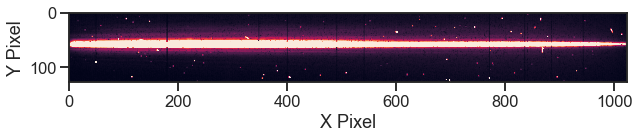

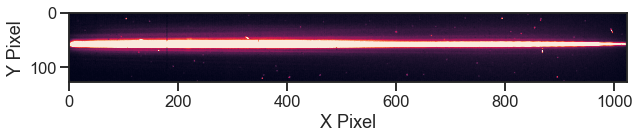

In [58]:
# comparison between the original and the cleaned image
# can easily see the lack of cosmic rays/bad pixels and removal of bad columns
plt.figure(figsize = (10,10))
im = plt.imshow(data_750[0][1])
im.set_clim(0,200)
plt.ylabel("Y Pixel")
plt.xlabel("X Pixel")
plt.show()
plt.figure(figsize = (10,10))
cim = plt.imshow(cleaned_1_750[1])
cim.set_clim(0,200)
plt.ylabel("Y Pixel")
plt.xlabel("X Pixel")
plt.show()


In [59]:
# now to clean the data - default is all steps on (dq, difference_correct, hc_correct, spline_correct)
# i'm breaking up the orbits manually here, not sure what the best way to do this automatically is yet
# the spline function is a little broken at the moment, but if we use optimal extraction it doesn't matter 
# if we don't use it, so we turn it off here
cleaned_1_430 = clean_data(data_430[0][:4], dqs = data_430[3][:4], traces = trace_fit_430[:4], spline_correct = False)
cleaned_2_430= clean_data(data_430[0][4:8], dqs = data_430[3][4:8], traces = trace_fit_430[4:8], spline_correct = False)
cleaned_3_430 = clean_data(data_430[0][8:12], dqs = data_430[3][8:12], traces = trace_fit_430[8:12], spline_correct = False)


In [60]:
cleaned_4_430 = clean_data(data_430[0][12:16], data_430[3][12:16], traces = trace_fit_430[12:16], spline_correct = False)
cleaned_5_430 = clean_data(data_430[0][16:20], data_430[3][16:20], traces = trace_fit_430[16:20], spline_correct = False)
cleaned_6_430 = clean_data(data_430[0][20:24], data_430[3][20:24], traces = trace_fit_430[20:24], spline_correct = False)

cleaned_7_430 = clean_data(data_430[0][24:28], data_430[3][24:28], traces = trace_fit_430[24:28], spline_correct = False)
cleaned_8_430 = clean_data(data_430[0][28:32], data_430[3][28:32], traces = trace_fit_430[28:32], spline_correct = False)
cleaned_9_430 = clean_data(data_430[0][32:36], data_430[3][32:36], traces = trace_fit_430[32:36], spline_correct = False)

cleaned_10_430 = clean_data(data_430[0][36:40], data_430[3][36:40], traces = trace_fit_430[36:40], spline_correct = False)
cleaned_11_430 = clean_data(data_430[0][40:44], data_430[3][40:44], traces = trace_fit_430[40:44], spline_correct = False)
cleaned_12_430 = clean_data(data_430[0][44:48], data_430[3][44:48], traces = trace_fit_430[44:48], spline_correct = False)

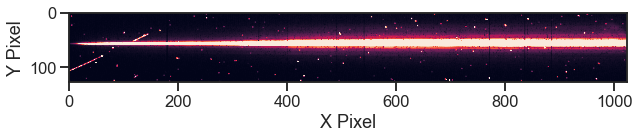

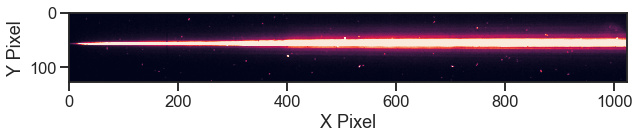

In [61]:
plt.figure(figsize = (10,10))
cim = plt.imshow(data_430[0][1])
cim.set_clim(0,200)
plt.ylabel("Y Pixel")
plt.xlabel("X Pixel")
plt.show()
plt.figure(figsize = (10,10))
cim = plt.imshow(cleaned_1_430[3])
cim.set_clim(0,200)
plt.ylabel("Y Pixel")
plt.xlabel("X Pixel")
plt.show()

In [ ]:
# now to clean the data - default is all steps on (dq, difference_correct, hc_correct, spline_correct)
# i'm breaking up the orbits manually here, not sure what the best way to do this automatically is yet
# the spline function is a little broken at the moment, but if we use optimal extraction it doesn't matter 
# if we don't use it, so we turn it off here
cleaned_21_430 = clean_data(data_430[0][48:54], dqs = data_430[3][48:54], traces = trace_fit_430[48:54], spline_correct = False)
cleaned_22_430= clean_data(data_430[0][54:59], dqs = data_430[3][54:59], traces = trace_fit_430[53:59], spline_correct = False)
cleaned_23_430 = clean_data(data_430[0][59:63], dqs = data_430[3][59:63], traces = trace_fit_430[59:64], spline_correct = False)

cleaned_24_430 = clean_data(data_430[0][63:67], data_430[3][63:67], traces = trace_fit_430[61:65], spline_correct = False)
cleaned_25_430 = clean_data(data_430[0][67:70], data_430[3][67:70], traces = trace_fit_430[65:70], spline_correct = False)
cleaned_26_430 = clean_data(data_430[0][70:74], data_430[3][70:74], traces = trace_fit_430[70:74], spline_correct = False)

cleaned_27_430 = clean_data(data_430[0][74:78], data_430[3][74:78], traces = trace_fit_430[74:78], spline_correct = False)
cleaned_28_430 = clean_data(data_430[0][78:81], data_430[3][78:81], traces = trace_fit_430[78:81], spline_correct = False)
cleaned_29_430 = clean_data(data_430[0][81:85], data_430[3][81:85], traces = trace_fit_430[81:85], spline_correct = False)

cleaned_210_430 = clean_data(data_430[0][85:89], data_430[3][85:89], traces = trace_fit_430[85:89], spline_correct = False)
cleaned_211_430 = clean_data(data_430[0][89:93], data_430[3][89:93], traces = trace_fit_430[89:93], spline_correct = False)
cleaned_212_430 = clean_data(data_430[0][93:], data_430[3][93:], traces = trace_fit_430[93:], spline_correct = False)


In [93]:
# just putting all of the cleaned files into one list
transit_750_cleaned = [*cleaned_1_750, *cleaned_2_750, *cleaned_3_750, *cleaned_4_750, *cleaned_5_750, *cleaned_6_750, *cleaned_7_750, *cleaned_8_750, *cleaned_9_750, *cleaned_10_750, *cleaned_11_750, *cleaned_12_750, *cleaned_13_750, *cleaned_14_750, *cleaned_15_750, *cleaned_16_750]
transit_430_cleaned = [*cleaned_1_430, *cleaned_2_430, *cleaned_3_430, *cleaned_4_430, *cleaned_5_430, *cleaned_6_430, *cleaned_7_430, *cleaned_8_430, *cleaned_9_430, *cleaned_10_430, *cleaned_11_430, *cleaned_12_430]
transit_430_2_cleaned = [*cleaned_21_430, *cleaned_22_430, *cleaned_23_430, *cleaned_24_430, *cleaned_25_430, *cleaned_26_430, *cleaned_27_430, *cleaned_28_430, *cleaned_29_430, *cleaned_210_430, *cleaned_211_430, *cleaned_212_430]

In [94]:
# save all of the cleaned images - doing this manually now, but will implement into the function later
# probably want to save the file names for the used data files to use
if os.path.exists("cleaned_data_wasp121") != True:
    os.makedirs("cleaned_data_wasp121")
for i in range(len(transit_750_cleaned)):
    filename = "cleaned_750_1_" + str(i).zfill(3) + ".fits"
    fits.writeto("cleaned_data_wasp121/"+filename, transit_750_cleaned[i], data_750[1][i], overwrite=True)
    fits.append("cleaned_data_wasp121/"+filename, data_750[4][i])
    
for i in range(len(transit_430_cleaned)):
    filename = "cleaned_430_1_" + str(i).zfill(3) + ".fits"
    fits.writeto("cleaned_data_wasp121/"+filename, transit_430_cleaned[i], data_430[1][i], overwrite=True)
    fits.append("cleaned_data_wasp121/"+filename, data_430[4][i])
    
for i in range(len(transit_430_2_cleaned)):
    filename = "cleaned_430_2_" + str(i).zfill(3) + ".fits"
    fits.writeto("cleaned_data_wasp121/"+filename, transit_430_2_cleaned[i], data_430[1][48+i], overwrite=True)
    fits.append("cleaned_data_wasp121/"+filename, data_430[4][48+i])


In [6]:
# and then just write the jitter dictionary to a pickle file for later use
with open('jitter_750.pkl', 'wb') as handle:
    pickle.dump(data_750[2], handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('jitter_430.pkl', 'wb') as handle:
    pickle.dump(data_430[2], handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
# now that we have the cleaned files, we don't need to run any of the above code a second time
# read those files in to have this as a new starting point
cleaned_data_430_1 = sorted(glob.glob("cleaned_data_wasp121/cleaned_430_1*"))
transit_430_cleaned = []
headers_430 = []
errs_430 = []
for i in cleaned_data_430_1:
    c_data, hdr = fits.getdata(i, ext = 0, header = True)
    transit_430_cleaned.append(c_data)
    headers_430.append(hdr)
    e_data = fits.getdata(i, ext = 1)
    errs_430.append(e_data)
    
cleaned_data_430_2 = sorted(glob.glob("cleaned_data_wasp121/cleaned_430_2*"))
transit_430_2_cleaned = []
headers_430_2 = []
errs_430_2 = []
for i in cleaned_data_430_2:
    c_data, hdr = fits.getdata(i, ext = 0, header = True)
    transit_430_2_cleaned.append(c_data)
    headers_430_2.append(hdr)
    e_data = fits.getdata(i, ext = 1)
    errs_430_2.append(e_data)

with open('jitter_430.pkl', 'rb') as handle:
    jit_430 = pickle.load(handle)

In [3]:
cleaned_data_750 = sorted(glob.glob("cleaned_data_wasp121/cleaned_750*"))
transit_750_cleaned = []
headers_750 = []
errs_750 = []
for i in cleaned_data_750:
    c_data, hdr = fits.getdata(i, ext = 0, header = True)
    transit_750_cleaned.append(c_data)
    headers_750.append(hdr)
    e_data = fits.getdata(i, ext = 1)
    errs_750.append(e_data)

with open('jitter_750.pkl', 'rb') as handle:
    jit_750 = pickle.load(handle)

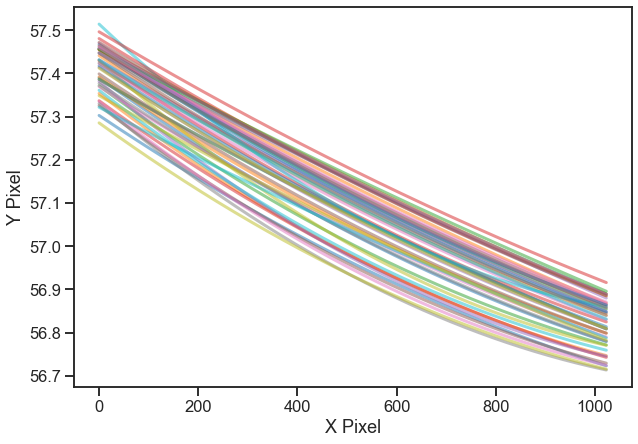

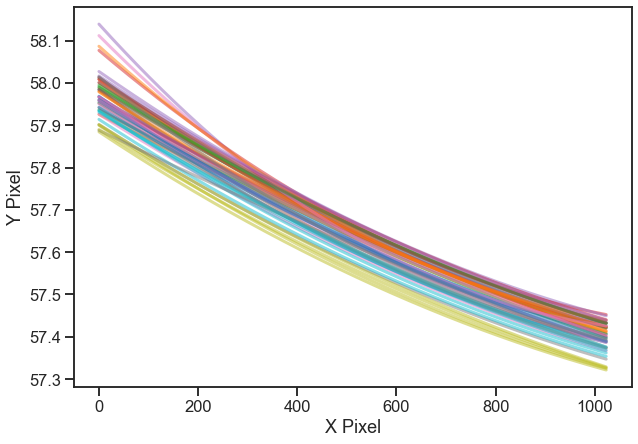

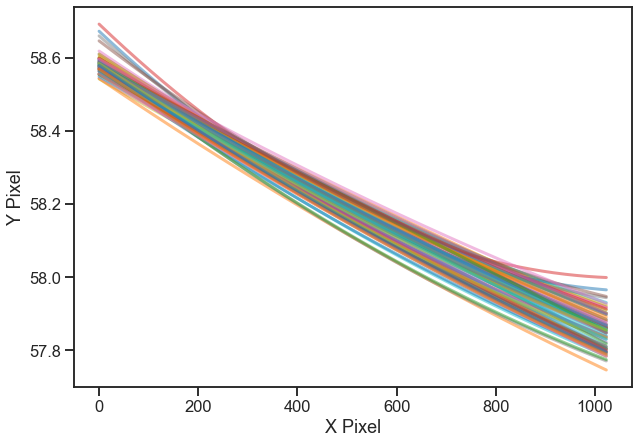

In [4]:
# now to retrace the cleaned data
trace_430_list = []
plt.figure(figsize = (10,7))
for i in transit_430_cleaned:
    trace = trace_spectrum(i, 200,1000,60)
    trace_430_list.append(trace)

trace_430_fit = []
for j in trace_430_list:
    coeffs1 = chebyshev.chebfit(j[0], j[1], deg=2)
    plt.plot(np.arange(len(transit_430_cleaned[0][0])),chebyshev.chebval(np.arange(len(transit_430_cleaned[0][0])),coeffs1),lw=3, alpha = 0.5)
    trace = [np.arange(len(transit_430_cleaned[0][0])),chebyshev.chebval(np.arange(len(transit_430_cleaned[0][0])),coeffs1)]
    trace_430_fit.append(trace)
plt.ylabel("Y Pixel")
plt.xlabel("X Pixel")
plt.show()

trace_430_2_list = []
plt.figure(figsize = (10,7))
for i in transit_430_2_cleaned:
    trace = trace_spectrum(i, 200,1000,60)
    trace_430_2_list.append(trace)

trace_430_2_fit = []
for j in trace_430_2_list:
    coeffs1 = chebyshev.chebfit(j[0], j[1], deg=2)
    plt.plot(np.arange(len(transit_430_2_cleaned[0][0])),chebyshev.chebval(np.arange(len(transit_430_2_cleaned[0][0])),coeffs1),lw=3, alpha = 0.5)
    trace = [np.arange(len(transit_430_2_cleaned[0][0])),chebyshev.chebval(np.arange(len(transit_430_2_cleaned[0][0])),coeffs1)]
    trace_430_2_fit.append(trace)
plt.ylabel("Y Pixel")
plt.xlabel("X Pixel")
plt.show()

trace_750_list = []
plt.figure(figsize = (10,7))
for i in transit_750_cleaned:
    trace = trace_spectrum(i, 200,1000,60)
    trace_750_list.append(trace)

trace_750_fit = []
for j in trace_750_list:
    coeffs1 = chebyshev.chebfit(j[0], j[1], deg=2)
    plt.plot(np.arange(len(transit_750_cleaned[0][0])),chebyshev.chebval(np.arange(len(transit_750_cleaned[0][0])),coeffs1),lw=3, alpha = 0.5)
    trace = [np.arange(len(transit_750_cleaned[0][0])),chebyshev.chebval(np.arange(len(transit_750_cleaned[0][0])),coeffs1)]
    trace_750_fit.append(trace)
plt.ylabel("Y Pixel")
plt.xlabel("X Pixel")
plt.show()


In [5]:
# now for the spectral extraction - I use optimal since I don't do the spline cleaning
spectra_430 = []
for i in range(len(transit_430_cleaned)):
    spec = spectral_extraction(transit_430_cleaned[i], trace_430_fit[i], method = "optimal")
    spectra_430.append(spec)

In [6]:
# now for the spectral extraction - I use optimal since I don't do the spline cleaning
spectra_430_2 = []
for i in range(len(transit_430_2_cleaned)):
    spec = spectral_extraction(transit_430_2_cleaned[i], trace_430_2_fit[i], method = "optimal")
    spectra_430_2.append(spec)

In [7]:
# now for the spectral extraction - I use optimal since I don't do the spline cleaning
spectra_750 = []
for i in range(len(transit_750_cleaned)):
    spec = spectral_extraction(transit_750_cleaned[i], trace_750_fit[i], method = "optimal")
    spectra_750.append(spec)

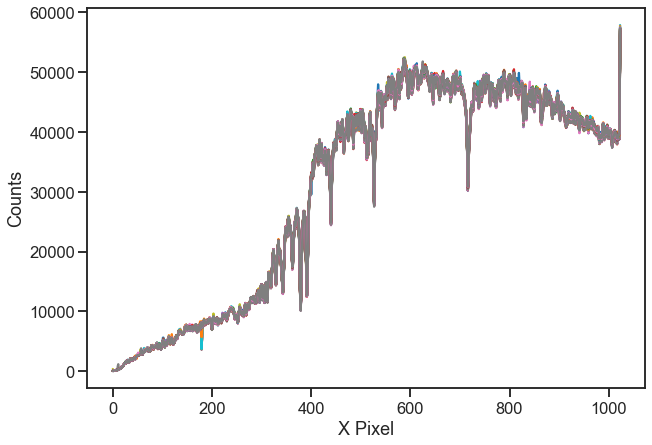

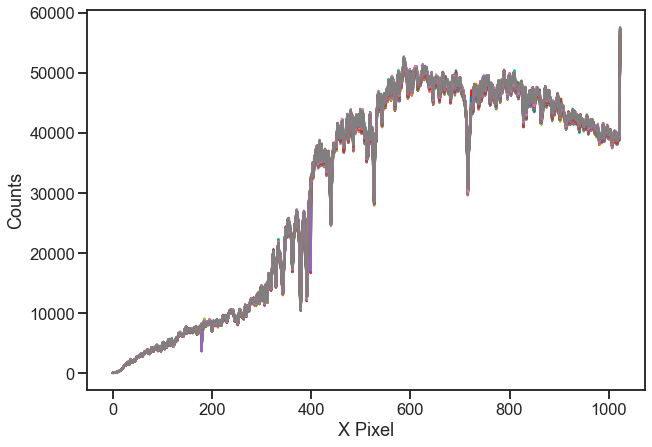

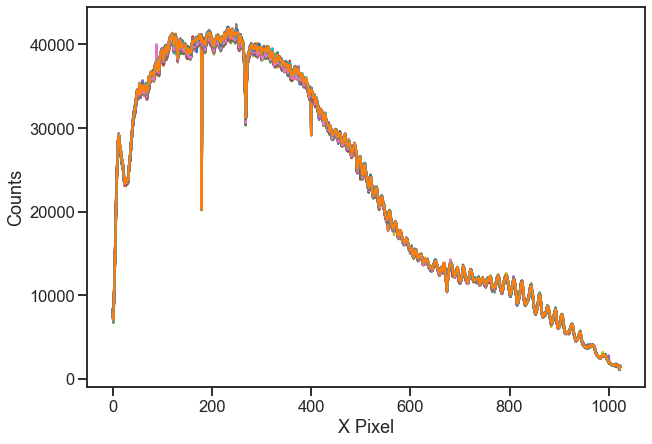

In [8]:
# plot all of the spectra on top of each other - looks pretty typical
plt.figure(figsize = (10,7))
for i in spectra_430:
    plt.plot(i[1])
plt.ylabel("Counts")
plt.xlabel("X Pixel")
plt.show()

plt.figure(figsize = (10,7))
for i in spectra_430_2:
    plt.plot(i[1])
plt.ylabel("Counts")
plt.xlabel("X Pixel")
plt.show()

plt.figure(figsize = (10,7))
for i in spectra_750:
    plt.plot(i[1])
plt.ylabel("Counts")
plt.xlabel("X Pixel")
plt.show()

In [9]:
# sum up each of the spectra for the white light curve
lc_430 = []
lc_err_430 = []
for i in spectra_430:
    point = np.nansum(i[1])
    # i assume error prop is just like sqrt(sum of squares of errors)
    # optimal extraction outputs inverse variance, so assume np.sqrt(np.nansum((1/np.sqrt(i[2]))**2)) is the error on each point
    err = np.sqrt(np.nansum((1/np.sqrt(i[2]))**2))
    lc_430.append(point)
    lc_err_430.append(err)
    
lc_430_2 = []
lc_err_430_2 = []
for i in spectra_430_2:
    point = np.nansum(i[1])
    # i assume error prop is just like sqrt(sum of squares of errors)
    # optimal extraction outputs inverse variance, so assume np.sqrt(np.nansum((1/np.sqrt(i[2]))**2)) is the error on each point
    err = np.sqrt(np.nansum((1/np.sqrt(i[2]))**2))
    lc_430_2.append(point)
    lc_err_430_2.append(err)
    
lc_750 = []
lc_err_750 = []
for i in spectra_750:
    point = np.nansum(i[1])
    # i assume error prop is just like sqrt(sum of squares of errors)
    # optimal extraction outputs inverse variance, so assume np.sqrt(np.nansum((1/np.sqrt(i[2]))**2)) is the error on each point
    err = np.sqrt(np.nansum((1/np.sqrt(i[2]))**2))
    lc_750.append(point)
    lc_err_750.append(err)

In [10]:
# now to deal with the timestamps. HST header times come in JDUTC, we want BJD-TBD 
times_430 = times_to_bjd(headers_430, starname = "WASP-121")
times_start_430 = times_430[0][0]
times_end_430 = times_430[0][1]

times_430_2 = times_to_bjd(headers_430_2, starname = "WASP-121")
times_start_430_2 = times_430_2[0][0]
times_end_430_2 = times_430_2[0][1]

times_750 = times_to_bjd(headers_750, starname = "WASP-121")
times_start_750 = times_750[0][0]
times_end_750 = times_750[0][1]

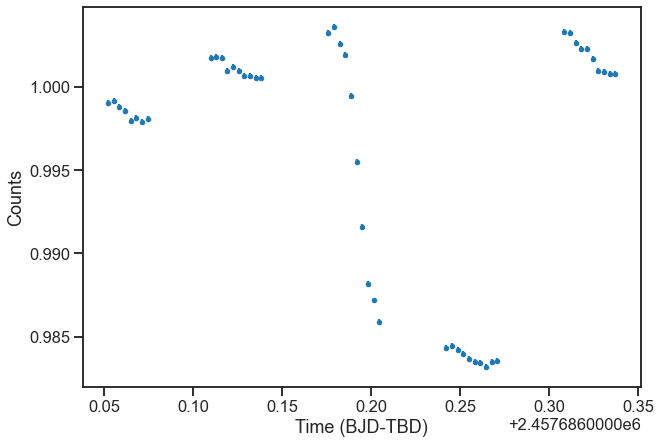

In [11]:
# should now be able to plot our raw white light curve - looks pretty good!
plt.figure(figsize = (10,7))
plt.errorbar(times_start_430, lc_430/np.nanmedian(lc_430), yerr = lc_err_430/np.nanmedian(lc_430), fmt = ".")
plt.xlabel("Time (BJD-TBD)")
plt.ylabel("Counts")
#plt.ylim(0.95, 1.01)
plt.show()

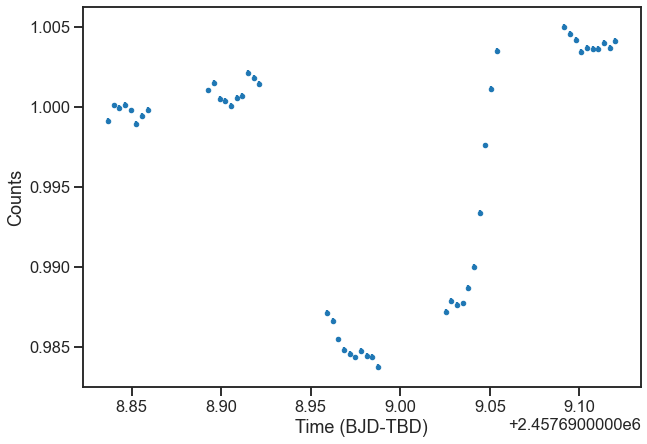

In [12]:
plt.figure(figsize = (10,7))
plt.errorbar(times_start_430_2, lc_430_2/np.nanmedian(lc_430_2), yerr = lc_err_430_2/np.nanmedian(lc_430_2), fmt = ".")
plt.xlabel("Time (BJD-TBD)")
plt.ylabel("Counts")
#plt.ylim(0.95, 1.01)
plt.show()

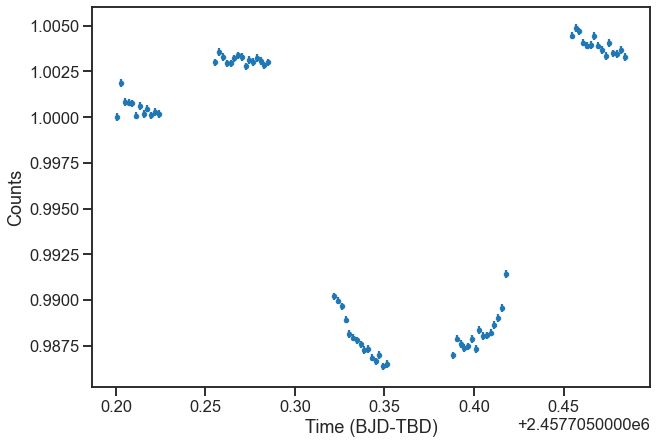

In [13]:
plt.figure(figsize = (10,7))
plt.errorbar(times_start_750, lc_750/lc_750[0], yerr = lc_err_750/np.nanmedian(lc_750), fmt = ".")
plt.xlabel("Time (BJD-TBD)")
plt.ylabel("Counts")
#plt.ylim(0.95, 1.02)
plt.show()

In [14]:
# before fitting, we just need to normalize our jitter vectors into standard deviation
jit_use = ["V2_roll", "V3_roll", "Latitude", "Longitude", "RA", "DEC"]
norm_jit_750 = {}
for i in jit_use:
    norm = (jit_750[i]/np.nanmean(jit_750[i]))-1
    norm_jit_750[i] = norm/np.std(norm)

In [15]:
# before fitting, we just need to normalize our jitter vectors into standard deviation
jit_use = ["V2_roll", "V3_roll", "Latitude", "Longitude", "RA", "DEC"]
norm_jit_430 = {}
for i in jit_use:
    norm = (jit_430[i][:48]/np.nanmean(jit_430[i][:48]))-1
    norm_jit_430[i] = norm/np.std(norm)
    
norm_jit_430_2 = {}
for i in jit_use:
    norm = (jit_430[i][48:]/np.nanmean(jit_430[i][48:]))-1
    norm_jit_430_2[i] = norm/np.std(norm)

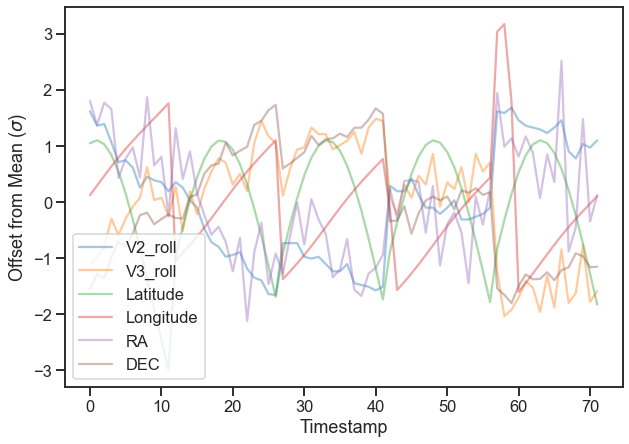

In [16]:
# check them out 
plt.figure(figsize = (10,7))
for i in norm_jit_750:
    plt.plot(norm_jit_750[i], alpha = 0.4, label = str(i))
plt.xlabel("Timestamp")
plt.ylabel(r"Offset from Mean ($\sigma$)")
plt.legend()
plt.show()

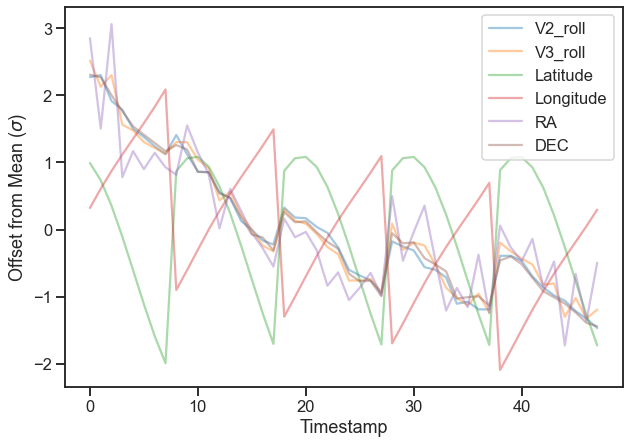

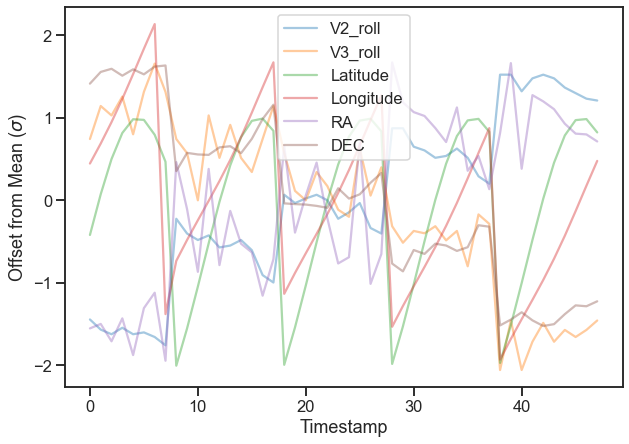

In [17]:
# check them out 
plt.figure(figsize = (10,7))
for i in norm_jit_430:
    plt.plot(norm_jit_430[i], alpha = 0.4, label = str(i))
plt.xlabel("Timestamp")
plt.ylabel(r"Offset from Mean ($\sigma$)")
plt.legend()
plt.show()

# check them out 
plt.figure(figsize = (10,7))
for i in norm_jit_430_2:
    plt.plot(norm_jit_430_2[i], alpha = 0.4, label = str(i))
plt.xlabel("Timestamp")
plt.ylabel(r"Offset from Mean ($\sigma$)")
plt.legend()
plt.show()

In [18]:
# to read into the white_light_fit functions, just need to create a dictionary like this - 
# put just the value if it should be fixed, and the value and range in a list if it should be fit
params = {"P": [1.274925],"t0": [2457686.2441857136, 0.1], "p": [0.12, 0.1], "b": [0.1], "a": [3.823], "ecc": [0], "omega": [90]}

In [19]:
# now for our white light curve + systematics fit
# first, a jitter systematics detrending fit
jitter_fit = white_light_fit(params, times_start_430, lc_430, norm_jit_430, sys_method = "jitter")
# this outputs a data cube [fit_param, fit_uncs, model_final, lc]

In [20]:
jitter_fit[0]

{'t0': 2457686.2457885244,
 'p': 0.12381750571698594,
 'V2_roll': 0.0137046639385256,
 'V3_roll': -0.0058471199122309145,
 'Latitude': 0.000493992914020307,
 'Longitude': -0.0004065728220439552,
 'RA': 0.002388118351200536,
 'DEC': -0.010674035345886616,
 'f0': 31454265.68085517}

In [23]:
# then, a gp systematics detrending fit
# if you use the gp method, you need to provide a name for an output folder with gp_name
gp_fit = white_light_fit(params, times_start_430, lc_430, norm_jit_430, sys_method = "gp", gp_name = "wasp-121_430_gptest_new", gp_kernel = "ExpSquared")
# this outputs a juliet "results" type - will show some ways of how to use that below

Detected multinest sampler output files --- extracting from wasp-121_430_gptest_new/posteriors.pkl


In [24]:
for i in gp_fit.posteriors['posterior_samples'].keys():
    print(i, np.median(gp_fit.posteriors['posterior_samples'][i]))

unnamed 0.12137611030139586
loglike 271.31452851610265
t0_p1 2457686.243814598
p_p1 0.12184516973543719
q1_STIS 0.4601577006625157
q2_STIS 0.4212401638050166
rho 678.0844139479439
mflux_STIS -0.0002710994706835131
sigma_w_STIS 41.15659552420985
GP_sigma_STIS 2256.7549742304145
GP_alpha0_STIS 0.005381124654045498
GP_alpha1_STIS 0.0017328281213106912
GP_alpha2_STIS 0.0011909006492330921
GP_alpha3_STIS 0.024507385890107224
GP_alpha4_STIS 0.00048427201967164246
GP_alpha5_STIS 0.007809643642309414


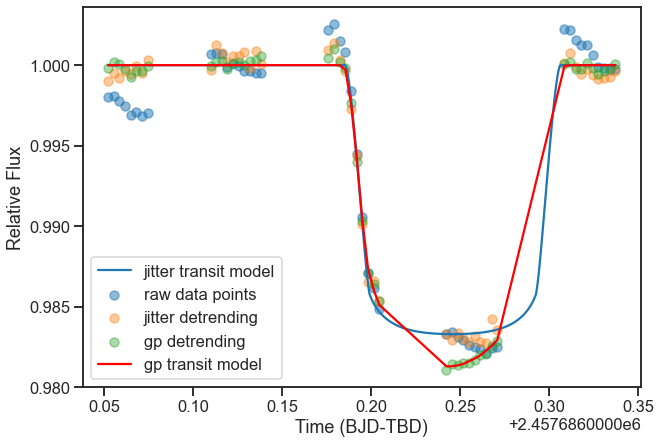

In [25]:
# let's plot the results of these fits 
plt.figure(figsize = (10,7))
# first the jitter detrending
t_final = np.linspace(times_start_430[0], times_start_430[-1], 1000)
plt.plot(t_final, jitter_fit[2][1], label = "jitter transit model")
plt.scatter(times_start_430, (lc_430/jitter_fit[2][0]), label = "raw data points", alpha = 0.5)
plt.scatter(times_start_430, (lc_430/jitter_fit[2][0])/jitter_fit[2][2], alpha=0.4, label = "jitter detrending")

# then the gp detrending
transit_plus_GP_model = gp_fit.lc.evaluate('STIS')
transit_model = gp_fit.lc.evaluate('STIS', evaluate_transit = True)

gp_model = transit_plus_GP_model - transit_model

#transit_plus_GP_model = gp_fit.lc.evaluate('STIS', t = t_final, GPregressors = t_gp)
#transit_model = gp_fit.lc.model['STIS']['deterministic']
#gp_model = gp_fit.lc.model['STIS']['GP']
# there may be a small vertical offset between the two models because of the different normalizations - account for that
offset = jitter_fit[2][1][0] - transit_model[0]
plt.scatter(times_start_430, (lc_430/lc_430[0]) - (transit_plus_GP_model - transit_model) + offset,alpha=0.4, label = "gp detrending")
#plt.plot(t_final, batman_model(t_final), color='black',zorder=10, label = "gp transit model (batman)")
plt.plot(times_start_430, transit_model + offset, color='red',zorder=10, label = "gp transit model")

# obviously the transit models are very different at the moment - i'm mostly just comparing the actual detrending of the
# data points so ignore that for now

plt.legend()
plt.ylabel("Relative Flux")
plt.xlabel("Time (BJD-TBD)")
plt.show()

In [109]:
# the gp transit model looks a little off because of the difficulty around interpolating GPs through time
# so to make it look better, let's just feed the values into a batman model
# just made some quick batman functions to easily plot - will implement these into the functions script later
import batman
def batman_model(t):
    """
    Given a time array t, an inclination "inc" and a wavelength in microns "w", this function returns 
    a lightcurve model including limb-darkening.
    """
    params = batman.TransitParams()
    params.t0 = 2457686.2441857136 # time of inferior conjunction
    params.per = 1.274925 # orbital period (days)
    params.a = 3.823 # semi-major axis (in units of stellar radii)
    params.rp = 0.12179368334171685
    params.inc = np.rad2deg(np.arccos(0.1/3.823)) # orbital inclination (in degrees)
    params.ecc = 0. # eccentricity
    params.w = 90. # longitude of periastron (in degrees) p
    params.limb_dark = 'quadratic' # limb darkening profile to use
    
    params.u = [2*np.sqrt(0.4953979784840889)*0.38920841055531125, np.sqrt(0.4953979784840889)*(1-2*0.38920841055531125)] # limb darkening coefficients

    tmodel = batman.TransitModel(params, t.astype('float64'))
    return tmodel.light_curve(params)


def batman_model_j(t):
    """
    Given a time array t, an inclination "inc" and a wavelength in microns "w", this function returns 
    a lightcurve model including limb-darkening.
    """
    params = batman.TransitParams()
    params.t0 = 2457686.2441857136 # time of inferior conjunction
    params.per = 1.274925 # orbital period (days)
    params.a = 3.823 # semi-major axis (in units of stellar radii)
    params.rp = 0.12381750571698594
    params.inc = np.rad2deg(np.arccos(0.1/3.823)) # orbital inclination (in degrees)
    params.ecc = 0. # eccentricity
    params.w = 90. # longitude of periastron (in degrees) p
    params.limb_dark = 'quadratic' # limb darkening profile to use
    
    params.u = [0.1, 0.3] # limb darkening coefficients

    tmodel = batman.TransitModel(params, t.astype('float64'))
    return tmodel.light_curve(params)

def batman_model_j_gp(t, t0, rp, q1, q2):
    """
    Given a time array t, an inclination "inc" and a wavelength in microns "w", this function returns 
    a lightcurve model including limb-darkening.
    """
    params = batman.TransitParams()
    params.t0 = t0 # time of inferior conjunction
    params.per = 1.274925 # orbital period (days)
    params.a = 3.823 # semi-major axis (in units of stellar radii)
    params.rp = rp
    params.inc = np.rad2deg(np.arccos(0.1/3.823)) # orbital inclination (in degrees)
    params.ecc = 0. # eccentricity
    params.w = 90. # longitude of periastron (in degrees) p
    params.limb_dark = 'quadratic' # limb darkening profile to use
    
    params.u = [2*np.sqrt(q1)*q2, np.sqrt(q1)*(1-2*q2)] # limb darkening coefficients

    tmodel = batman.TransitModel(params, t.astype('float64'))
    return tmodel.light_curve(params)


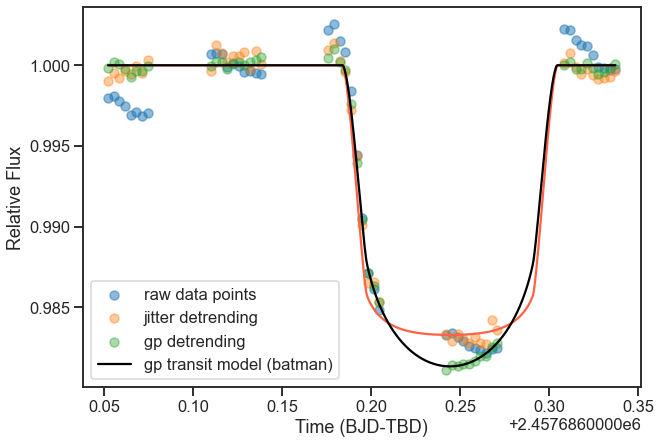

In [27]:
# plot with our new batman model function
plt.figure(figsize = (10,7))
# first the jitter detrending
t_final = np.linspace(times_start_430[0], times_start_430[-1], 1000)
#plt.plot(t_final, jitter_fit[2][1], label = "jitter transit model")
plt.plot(t_final, batman_model_j(t_final), color = "tomato")
plt.scatter(times_start_430, (lc_430/jitter_fit[2][0]), label = "raw data points", alpha = 0.5)
plt.scatter(times_start_430, (lc_430/jitter_fit[2][0])/jitter_fit[2][2], alpha=0.4, label = "jitter detrending")

# then the gp detrending
transit_plus_GP_model = gp_fit.lc.evaluate('STIS')
transit_model = gp_fit.lc.evaluate('STIS', evaluate_transit = True)

gp_model = transit_plus_GP_model - transit_model

#transit_plus_GP_model = gp_fit.lc.evaluate('STIS', t = t_final, GPregressors = t_gp)
#transit_model = gp_fit.lc.model['STIS']['deterministic']
#gp_model = gp_fit.lc.model['STIS']['GP']
# there may be a small vertical offset between the two models because of the different normalizations - account for that
offset = jitter_fit[2][1][0] - transit_model[0]
plt.scatter(times_start_430, (lc_430/lc_430[0]) - (transit_plus_GP_model - transit_model) + offset,alpha=0.4, label = "gp detrending")
plt.plot(t_final, batman_model(t_final), color='black',zorder=10, label = "gp transit model (batman)")
#plt.plot(times_start_430, transit_model + offset, color='red',zorder=10, label = "gp transit model")

# obviously the transit models are very different at the moment - i'm mostly just comparing the actual detrending of the
# data points so ignore that for now

plt.legend()
plt.ylabel("Relative Flux")
plt.xlabel("Time (BJD-TBD)")
plt.show()

Text(0.5, 0, 'Phase')

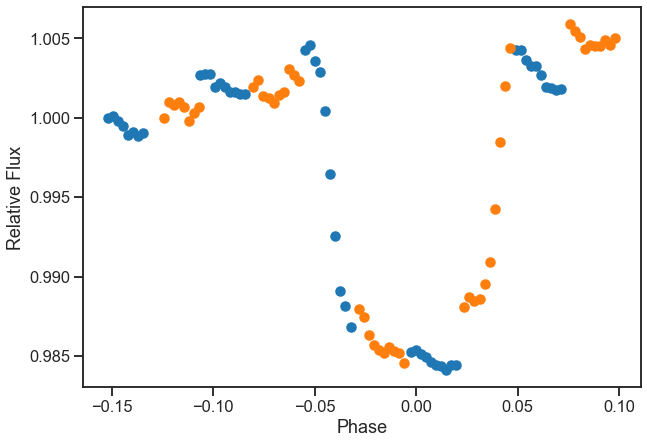

In [56]:
# the wasp-121 b G430L data is beautifully phased, as shown, which we can use to our advantage!
phases = juliet.utils.get_phases(times_start_430, 1.274925, jitter_fit[0]["t0"])
phases_2 = juliet.utils.get_phases(times_start_430_2, 1.274925, jitter_fit[0]["t0"])

plt.figure(figsize = (10,7))
plt.scatter(phases, lc_430/lc_430[0])
plt.scatter(phases_2, lc_430_2/lc_430_2[0])
plt.ylabel("Relative Flux")
plt.xlabel("Phase")

In [30]:
# so now, instead, we fit multiple transits at the same time
# first, with a GP method
gp_fit_joint = joint_white_light_fit(params, times_start_430, lc_430, norm_jit_430, times_start_430_2, lc_430_2, norm_jit_430_2, sys_method = "gp", gp_name = "wasp-121_430_joint_phase", gp_kernel = "ExpSquared")

Detected multinest sampler output files --- extracting from wasp-121_430_joint_phase/posteriors.pkl


In [91]:
for i in gp_fit_joint.posteriors['posterior_samples'].keys():
    print(i, ":", np.median(gp_fit_joint.posteriors['posterior_samples'][i]))

unnamed : 0.04159889267165323
loglike : 541.0360082395337
t0_p1 : 2457686.2450162093
p_p1 : 0.12254823554414787
q1_STIS1_STIS2 : 0.26243303485758596
q2_STIS1_STIS2 : 0.5394528887854607
rho : 660.9441871372914
mflux_STIS1 : -0.0010014440124553187
sigma_w_STIS1 : 43.91692529984303
GP_sigma_STIS1 : 1512.1234988739288
mflux_STIS2 : -0.002479037058415557
sigma_w_STIS2 : 43.27629300740267
GP_sigma_STIS2 : 1507.8875403372106
GP_alpha0_STIS1 : 0.004714714747606035
GP_alpha1_STIS1 : 0.0030331822547162977
GP_alpha2_STIS1 : 0.0011957516592797529
GP_alpha3_STIS1 : 0.050200567878876605
GP_alpha4_STIS1 : 0.0005165800882228644
GP_alpha5_STIS1 : 0.006011332944146055
GP_alpha0_STIS2 : 0.010525744484437029
GP_alpha1_STIS2 : 0.0008766302991007539
GP_alpha2_STIS2 : 0.00035466306208263083
GP_alpha3_STIS2 : 0.0002851113269529508
GP_alpha4_STIS2 : 0.0004452844178469652
GP_alpha5_STIS2 : 0.02208756565713609


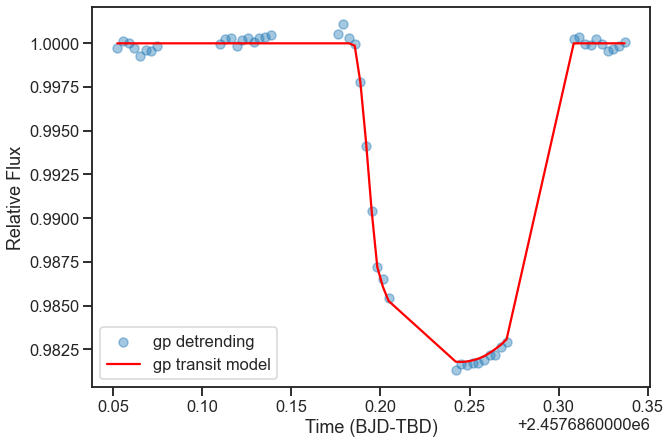

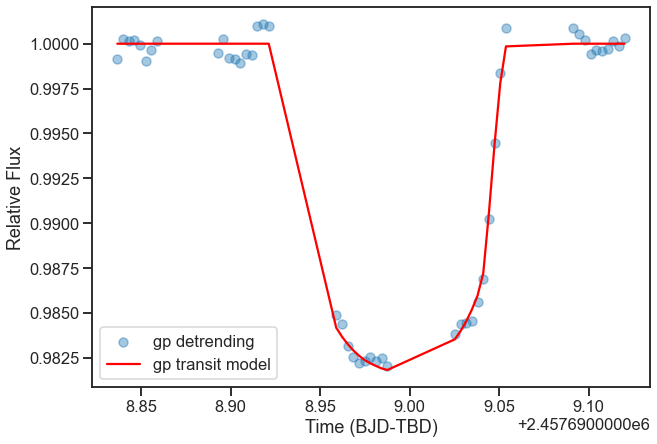

In [36]:
# first plot the two transits individually
transit_plus_GP_model = gp_fit_joint.lc.evaluate('STIS1')
transit_model = gp_fit_joint.lc.evaluate('STIS1', evaluate_transit = True)

gp_model = transit_plus_GP_model - transit_model

plt.figure(figsize = (10,7))

#transit_plus_GP_model = gp_fit.lc.evaluate('STIS', t = t_final, GPregressors = t_gp)
#transit_model = gp_fit.lc.model['STIS']['deterministic']
#gp_model = gp_fit.lc.model['STIS']['GP']
# there may be a small vertical offset between the two models because of the different normalizations - account for that
offset = jitter_fit[2][1][0] - transit_model[0]
plt.scatter(times_start_430, (lc_430/lc_430[0]) - (transit_plus_GP_model - transit_model) + offset,alpha=0.4, label = "gp detrending")
#plt.plot(t_final, batman_model(t_final), color='black',zorder=10, label = "gp transit model (batman)")
plt.plot(times_start_430, transit_model + offset, color='red',zorder=10, label = "gp transit model")

plt.legend()
plt.ylabel("Relative Flux")
plt.xlabel("Time (BJD-TBD)")
plt.show()

plt.figure(figsize = (10,7))

transit_plus_GP_model = gp_fit_joint.lc.evaluate('STIS2')
transit_model = gp_fit_joint.lc.evaluate('STIS2', evaluate_transit = True)

gp_model = transit_plus_GP_model - transit_model

#transit_plus_GP_model = gp_fit.lc.evaluate('STIS', t = t_final, GPregressors = t_gp)
#transit_model = gp_fit.lc.model['STIS']['deterministic']
#gp_model = gp_fit.lc.model['STIS']['GP']
# there may be a small vertical offset between the two models because of the different normalizations - account for that
offset = jitter_fit[2][1][0] - transit_model[0]
plt.scatter(times_start_430_2, (lc_430_2/lc_430_2[0]) - (transit_plus_GP_model - transit_model) + offset,alpha=0.4, label = "gp detrending")
#plt.plot(t_final, batman_model(t_final), color='black',zorder=10, label = "gp transit model (batman)")
plt.plot(times_start_430_2, transit_model + offset, color='red',zorder=10, label = "gp transit model")

plt.legend()
plt.ylabel("Relative Flux")
plt.xlabel("Time (BJD-TBD)")
plt.show()


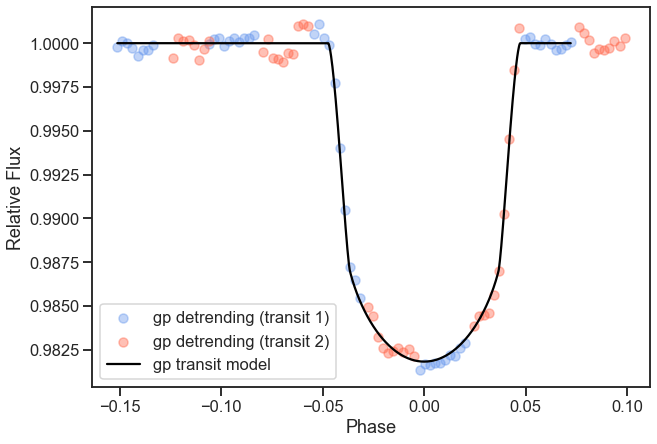

In [112]:
# then phased together

plt.figure(figsize = (10,7))

phases = juliet.utils.get_phases(times_start_430, 1.274925, np.median(gp_fit_joint.posteriors['posterior_samples']["t0_p1"]))
phases_2 = juliet.utils.get_phases(times_start_430_2, 1.274925, np.median(gp_fit_joint.posteriors['posterior_samples']["t0_p1"]))

transit_plus_GP_model1 = gp_fit_joint.lc.evaluate('STIS1')
transit_model1 = gp_fit_joint.lc.evaluate('STIS1', evaluate_transit = True)

gp_model1 = transit_plus_GP_model1 - transit_model1

transit_plus_GP_model2 = gp_fit_joint.lc.evaluate('STIS2')
transit_model2 = gp_fit_joint.lc.evaluate('STIS2', evaluate_transit = True)

gp_model2 = transit_plus_GP_model2 - transit_model2

offset1 = jitter_fit[2][1][0] - transit_model1[0]

offset2 = jitter_fit[2][1][0] - transit_model2[0]

t_final = np.linspace(times_start_430[0], times_start_430[-1], 1000)
q1 = [v for (k,v) in gp_fit_joint.posteriors['posterior_samples'].items() if 'q1' in k][0]
q2 = [v for (k,v) in gp_fit_joint.posteriors['posterior_samples'].items() if 'q2' in k][0]
b_model = batman_model_j_gp(t_final, np.median(gp_fit_joint.posteriors['posterior_samples']["t0_p1"]), np.median(gp_fit_joint.posteriors['posterior_samples']["p_p1"]), np.median(q1), np.median(q2))
model_phases = juliet.utils.get_phases(t_final, 1.274925, np.median(gp_fit_joint.posteriors['posterior_samples']["t0_p1"]))

plt.scatter(phases, (lc_430/lc_430[0]) - (transit_plus_GP_model1 - transit_model1) + offset1,alpha=0.4, label = "gp detrending (transit 1)", color = "cornflowerblue")
#plt.plot(t_final, batman_model(t_final), color='black',zorder=10, label = "gp transit model (batman)")
#plt.plot(phases, transit_model1 + offset1, color='cornflowerblue',zorder=10, label = "gp transit model (transit 1)")

plt.scatter(phases_2, (lc_430_2/lc_430_2[0]) - (transit_plus_GP_model2 - transit_model2) + offset2,alpha=0.4, label = "gp detrending (transit 2)", color = "tomato")
#plt.plot(t_final, batman_model(t_final), color='black',zorder=10, label = "gp transit model (batman)")
#plt.plot(phases_2, transit_model2 + offset2, color='tomato',zorder=10, label = "gp transit model (transit 2)")
plt.plot(model_phases, b_model, color = "black", label = "gp transit model")

plt.legend()
plt.ylabel("Relative Flux")
plt.xlabel("Phase")
plt.show()


In [37]:
# now for a joint jitter fit
jitter_fit_joint = joint_white_light_fit(params, times_start_430, lc_430, norm_jit_430, times_start_430_2, lc_430_2, norm_jit_430_2, sys_method = "jitter", N_iters=5)

In [38]:
jitter_fit_joint[0]

{'t0': 2457686.244654903,
 'p': 0.12645903222631524,
 'V2_roll_1': 0.009089637094128024,
 'V3_roll_1': -0.0021131400101386446,
 'Latitude_1': 0.0005566671994883734,
 'Longitude_1': 0.00040611356965216376,
 'RA_1': 0.0011705171745440399,
 'DEC_1': -0.00896039713408667,
 'V2_roll_2': 0.0025137153324394294,
 'V3_roll_2': 0.0013834831435230834,
 'Latitude_2': -0.0006427628035620859,
 'Longitude_2': 0.0001909229840813111,
 'RA_2': -0.0013047571891305152,
 'DEC_2': -0.0015736274933728187,
 'f0': 31450003.007668342}

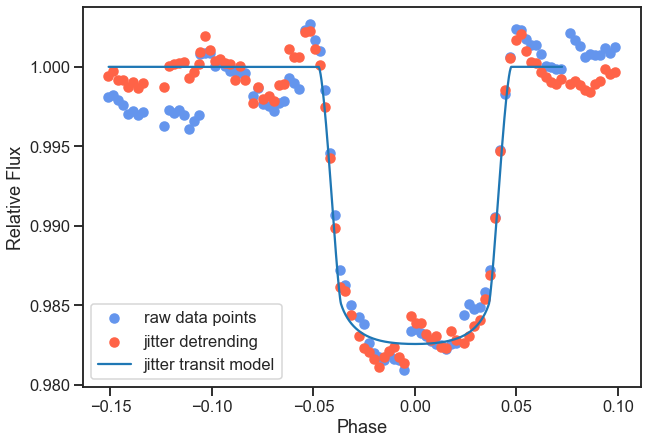

In [39]:
# jitter fit doesn't look perfect yet, but I'll work on it
plt.figure(figsize = (10,7))
plt.scatter(phases, lc_430/jitter_fit_joint[2][0], color = "cornflowerblue", label = "raw data points")
plt.scatter(phases_2, lc_430_2/jitter_fit_joint[2][0], color = "cornflowerblue")

t_final = np.linspace(times_start_430[0], times_start_430[-1], 1000) 
phases_lc = juliet.utils.get_phases(t_final, 1.274925, jitter_fit_joint[0]["t0"])

plt.scatter(phases, (lc_430/jitter_fit_joint[2][0])/jitter_fit_joint[2][2][0], color = "tomato", label = "jitter detrending")
plt.scatter(phases_2, (lc_430_2/jitter_fit_joint[2][0])/jitter_fit_joint[2][2][1], color = "tomato")
plt.plot(phases_lc, jitter_fit_joint[2][1], label = "jitter transit model")

plt.ylabel("Relative Flux")
plt.xlabel("Phase")
plt.legend()

In [40]:
# was suggested to try the matern kernel instead of the expsquared for the GP, so trying that here for the joint fit
gp_fit_joint_matern = joint_white_light_fit(params, times_start_430, lc_430, norm_jit_430, times_start_430_2, lc_430_2, norm_jit_430_2, sys_method = "gp", gp_name = "wasp-121_430_joint_phase_matern", gp_kernel = "Matern")

  analysing data from wasp-121_430_joint_phase_matern/jomnest_.txt


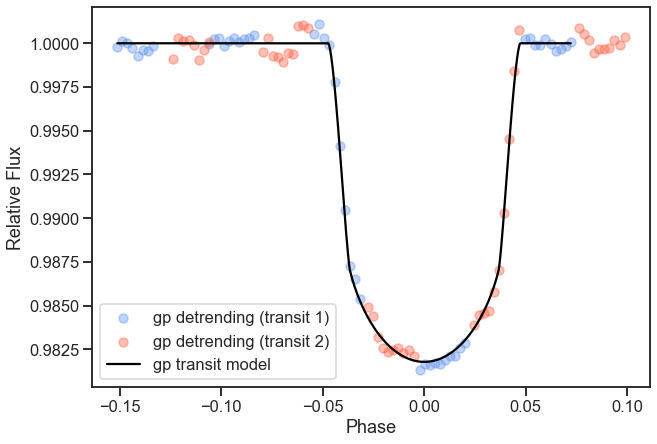

In [114]:
# lets plot it

plt.figure(figsize = (10,7))

phases = juliet.utils.get_phases(times_start_430, 1.274925, np.median(gp_fit_joint_matern.posteriors['posterior_samples']["t0_p1"]))
phases_2 = juliet.utils.get_phases(times_start_430_2, 1.274925, np.median(gp_fit_joint_matern.posteriors['posterior_samples']["t0_p1"]))

transit_plus_GP_model1 = gp_fit_joint_matern.lc.evaluate('STIS1')
transit_model1 = gp_fit_joint_matern.lc.evaluate('STIS1', evaluate_transit = True)

gp_model1 = transit_plus_GP_model1 - transit_model1

transit_plus_GP_model2 = gp_fit_joint_matern.lc.evaluate('STIS2')
transit_model2 = gp_fit_joint_matern.lc.evaluate('STIS2', evaluate_transit = True)

gp_model2 = transit_plus_GP_model2 - transit_model2

offset1 = jitter_fit_joint[2][1][0] - transit_model1[0]

offset2 = jitter_fit_joint[2][1][0] - transit_model2[0]

t_final = np.linspace(times_start_430[0], times_start_430[-1], 1000)
q1 = [v for (k,v) in gp_fit_joint_matern.posteriors['posterior_samples'].items() if 'q1' in k][0]
q2 = [v for (k,v) in gp_fit_joint_matern.posteriors['posterior_samples'].items() if 'q2' in k][0]
b_model = batman_model_j_gp(t_final, np.median(gp_fit_joint_matern.posteriors['posterior_samples']["t0_p1"]), np.median(gp_fit_joint_matern.posteriors['posterior_samples']["p_p1"]), np.median(q1), np.median(q2))
model_phases = juliet.utils.get_phases(t_final, 1.274925, np.median(gp_fit_joint.posteriors['posterior_samples']["t0_p1"]))

plt.scatter(phases, (lc_430/lc_430[0]) - (transit_plus_GP_model1 - transit_model1) + offset1,alpha=0.4, label = "gp detrending (transit 1)", color = "cornflowerblue")
#plt.plot(t_final, batman_model(t_final), color='black',zorder=10, label = "gp transit model (batman)")
#plt.plot(phases, transit_model1 + offset1, color='cornflowerblue',zorder=10, label = "gp transit model (transit 1)")

plt.scatter(phases_2, (lc_430_2/lc_430_2[0]) - (transit_plus_GP_model2 - transit_model2) + offset2,alpha=0.4, label = "gp detrending (transit 2)", color = "tomato")
#plt.plot(t_final, batman_model(t_final), color='black',zorder=10, label = "gp transit model (batman)")
#plt.plot(phases_2, transit_model2 + offset2, color='tomato',zorder=10, label = "gp transit model (transit 2)")
plt.plot(model_phases, b_model, color = "black", label = "gp transit model")

plt.legend()
plt.ylabel("Relative Flux")
plt.xlabel("Phase")
plt.show()
# looks pretty similar - will need to investigate more later

In [87]:
# seems clear that the first (non one second) point in each orbit is causing problems - let's manually remove it
# and try the fits again. since I'm doing it manually right now, I need to identify the points myself (will automate later)
# for both transits, the first in each orbit will be the 0,8,18,28,38 points

lc_430_less = np.copy(lc_430)
lc_430_less = np.delete(lc_430_less, [0,8,18,28,38])
times_start_430_less = np.copy(times_start_430)
times_start_430_less = np.delete(times_start_430_less, [0,8,18,28,38])
lc_430_2_less = np.copy(lc_430_2)
lc_430_2_less = np.delete(lc_430_2_less, [0,8,18,28,38])
times_start_430_2_less = np.copy(times_start_430_2)
times_start_430_2_less = np.delete(times_start_430_2_less, [0,8,18,28,38])

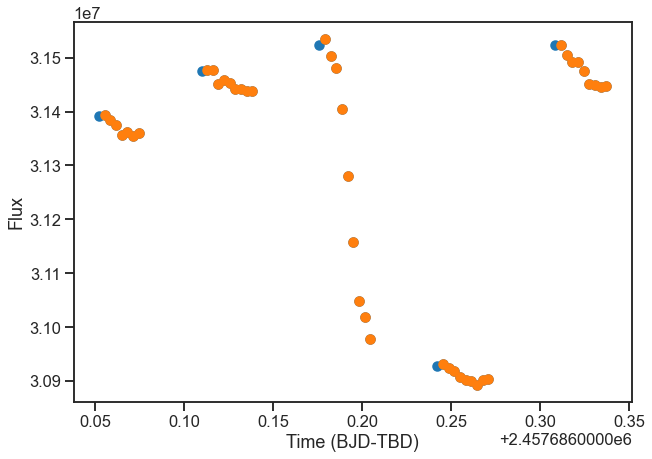

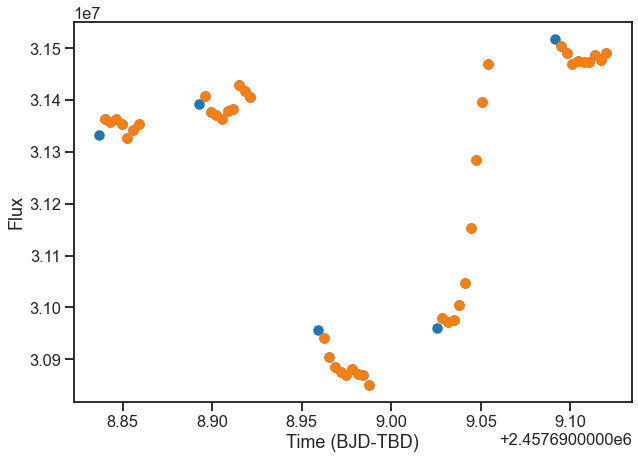

In [88]:
# plot just to double check that the right points are being removed
plt.figure(figsize = (10,7))
plt.ylabel("Flux")
plt.xlabel("Time (BJD-TBD)")

plt.scatter(times_start_430, lc_430)
plt.scatter(times_start_430_less, lc_430_less)
plt.show()

plt.figure(figsize = (10,7))
plt.ylabel("Flux")
plt.xlabel("Time (BJD-TBD)")

plt.scatter(times_start_430_2, lc_430_2)
plt.scatter(times_start_430_2_less, lc_430_2_less)
plt.show()

In [89]:
# same for the jitter vector lists
norm_jit_430_less = {}
norm_jit_430_2_less = {}
for i in norm_jit_430.keys():
    less = np.delete(norm_jit_430[i], [0,8,18,28,38])
    norm_jit_430_less[i] = less
    
    less_2 = np.delete(norm_jit_430_2[i], [0,8,18,28,38])
    norm_jit_430_2_less[i] = less_2

In [90]:
# retry the joint fits without the first point in each orbit (using matern for GP)
jitter_fit_joint_less = joint_white_light_fit(params, times_start_430_less, lc_430_less, norm_jit_430_less, times_start_430_2_less, lc_430_2_less, norm_jit_430_2_less, sys_method = "jitter", N_iters=5)
gp_fit_joint_less = joint_white_light_fit(params, times_start_430_less, lc_430_less, norm_jit_430_less, times_start_430_2_less, lc_430_2_less, norm_jit_430_2_less, sys_method = "gp", gp_name = "wasp-121_430_joint_phase_matern_less", gp_kernel = "Matern")

  analysing data from wasp-121_430_joint_phase_matern_less/jomnest_.txt


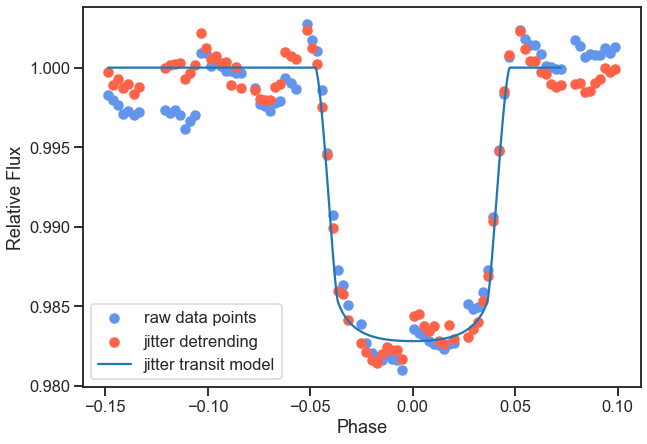

In [92]:
# plot the jitter fit
phases_less = juliet.utils.get_phases(times_start_430_less, 1.274925, jitter_fit_joint_less[0]["t0"])
phases_2_less = juliet.utils.get_phases(times_start_430_2_less, 1.274925, jitter_fit_joint_less[0]["t0"])

plt.figure(figsize = (10,7))
plt.scatter(phases_less, lc_430_less/jitter_fit_joint_less[2][0], color = "cornflowerblue", label = "raw data points")
plt.scatter(phases_2_less, lc_430_2_less/jitter_fit_joint_less[2][0], color = "cornflowerblue")

t_final_less = np.linspace(times_start_430_less[0], times_start_430_less[-1], 1000) 
phases_lc_less = juliet.utils.get_phases(t_final_less, 1.274925, jitter_fit_joint_less[0]["t0"])

plt.scatter(phases_less, (lc_430_less/jitter_fit_joint_less[2][0])/jitter_fit_joint_less[2][2][0], color = "tomato", label = "jitter detrending")
plt.scatter(phases_2_less, (lc_430_2_less/jitter_fit_joint_less[2][0])/jitter_fit_joint_less[2][2][1], color = "tomato")
plt.plot(phases_lc_less, jitter_fit_joint_less[2][1], label = "jitter transit model")

plt.ylabel("Relative Flux")
plt.xlabel("Phase")
plt.legend()

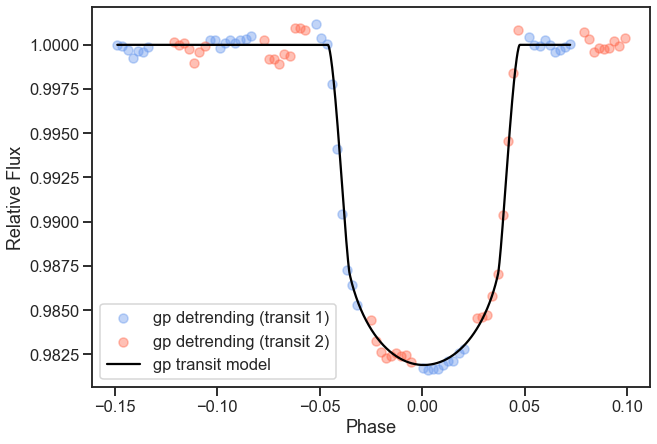

In [117]:
# and the gp fit

plt.figure(figsize = (10,7))

phases_less = juliet.utils.get_phases(times_start_430_less, 1.274925, np.median(gp_fit_joint_less.posteriors['posterior_samples']["t0_p1"]))
phases_2_less = juliet.utils.get_phases(times_start_430_2_less, 1.274925, np.median(gp_fit_joint_less.posteriors['posterior_samples']["t0_p1"]))

transit_plus_GP_model1 = gp_fit_joint_less.lc.evaluate('STIS1')
transit_model1 = gp_fit_joint_less.lc.evaluate('STIS1', evaluate_transit = True)

gp_model1 = transit_plus_GP_model1 - transit_model1

transit_plus_GP_model2 = gp_fit_joint_less.lc.evaluate('STIS2')
transit_model2 = gp_fit_joint_less.lc.evaluate('STIS2', evaluate_transit = True)

gp_model2 = transit_plus_GP_model2 - transit_model2

offset1 = jitter_fit_joint_less[2][1][0] - transit_model1[0]

offset2 = jitter_fit_joint_less[2][1][0] - transit_model2[0]

t_final_less = np.linspace(times_start_430_less[0], times_start_430_less[-1], 1000)
q1 = [v for (k,v) in gp_fit_joint_less.posteriors['posterior_samples'].items() if 'q1' in k][0]
q2 = [v for (k,v) in gp_fit_joint_less.posteriors['posterior_samples'].items() if 'q2' in k][0]
b_model_less = batman_model_j_gp(t_final, np.median(gp_fit_joint_less.posteriors['posterior_samples']["t0_p1"]), np.median(gp_fit_joint_less.posteriors['posterior_samples']["p_p1"]), np.median(q1), np.median(q2))
model_phases_less = juliet.utils.get_phases(t_final_less, 1.274925, np.median(gp_fit_joint_less.posteriors['posterior_samples']["t0_p1"]))

plt.scatter(phases_less, (lc_430_less/lc_430_less[0]) - (transit_plus_GP_model1 - transit_model1) + offset1,alpha=0.4, label = "gp detrending (transit 1)", color = "cornflowerblue")
#plt.plot(t_final, batman_model(t_final), color='black',zorder=10, label = "gp transit model (batman)")
#plt.plot(phases, transit_model1 + offset1, color='cornflowerblue',zorder=10, label = "gp transit model (transit 1)")

plt.scatter(phases_2_less, (lc_430_2_less/lc_430_2_less[0]) - (transit_plus_GP_model2 - transit_model2) + offset2,alpha=0.4, label = "gp detrending (transit 2)", color = "tomato")
#plt.plot(t_final, batman_model(t_final), color='black',zorder=10, label = "gp transit model (batman)")
#plt.plot(phases_2, transit_model2 + offset2, color='tomato',zorder=10, label = "gp transit model (transit 2)")
plt.plot(model_phases_less, b_model_less, color = "black", label = "gp transit model")

plt.legend()
plt.ylabel("Relative Flux")
plt.xlabel("Phase")
plt.show()